Drive link

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [78]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib

Importing dataset


In [79]:
# Download NLTK resources
nltk.download("punkt")
nltk.download("stopwords")

# Load the dataset
df = pd.read_csv('/dataset.csv')

print(df.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
df.isnull().sum().sum()

46992

In [81]:
import numpy as np
np.prod(df.shape)

88560

In [82]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


**Preprocessing**

In [83]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum().sum())
df.head()

0


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,abnormal_menstruation,chest_pain,chest_pain,blood_in_sputum,muscle_pain
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,abnormal_menstruation,chest_pain,chest_pain,blood_in_sputum,muscle_pain
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,abnormal_menstruation,chest_pain,chest_pain,blood_in_sputum,muscle_pain
3,Fungal infection,itching,skin_rash,dischromic _patches,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,abnormal_menstruation,chest_pain,chest_pain,blood_in_sputum,muscle_pain
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,abnormal_menstruation,chest_pain,chest_pain,blood_in_sputum,muscle_pain


In [84]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,abnormal_menstruation,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,726,1554,2376,2916,3252,3456,3606,3846,4302,4488,4710,4824,4800,4920


In [85]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
for col in df.columns:

    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
3,Fungal infection,itching,skin rash,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
4,Fungal infection,itching,skin rash,nodal skin eruptions,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain


In [87]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
3,Fungal infection,itching,skin rash,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
4,Fungal infection,itching,skin rash,nodal skin eruptions,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain


In [88]:
for col in df.columns:
    df[col] = df[col].str.lower()

df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
1,fungal infection,skin rash,nodal skin eruptions,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
2,fungal infection,itching,nodal skin eruptions,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
3,fungal infection,itching,skin rash,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain
4,fungal infection,itching,skin rash,nodal skin eruptions,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,abnormal menstruation,chest pain,chest pain,blood in sputum,muscle pain


In [89]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# Combine symptoms into a single text field
df["combined_symptoms"] = df.iloc[:, 1:].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the combined symptoms
tfidf_matrix = tfidf.fit_transform(df["combined_symptoms"])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

df_final = pd.concat([df["Disease"], tfidf_df], axis=1)

# Display the resulting DataFrame
print(df_final.head())


            Disease  abdomen  abdominal  abnormal  acidity  acute  alcohol  \
0  fungal infection      0.0   0.191328  0.080001      0.0    0.0      0.0   
1  fungal infection      0.0   0.191153  0.079928      0.0    0.0      0.0   
2  fungal infection      0.0   0.198002  0.082792      0.0    0.0      0.0   
3  fungal infection      0.0   0.224176  0.093736      0.0    0.0      0.0   
4  fungal infection      0.0   0.210098  0.087849      0.0    0.0      0.0   

   altered  anal  and  ...  visual  vomiting  walking  wasting  watering  \
0      0.0   0.0  0.0  ...     0.0       0.0      0.0      0.0       0.0   
1      0.0   0.0  0.0  ...     0.0       0.0      0.0      0.0       0.0   
2      0.0   0.0  0.0  ...     0.0       0.0      0.0      0.0       0.0   
3      0.0   0.0  0.0  ...     0.0       0.0      0.0      0.0       0.0   
4      0.0   0.0  0.0  ...     0.0       0.0      0.0      0.0       0.0   

   weakness  weight  yellow  yellowing  yellowish  
0       0.0     0.0   

In [90]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

df["combined_symptoms"] = df.iloc[:, 1:].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

label_encoder = LabelEncoder()
df["Disease_encoded"] = label_encoder.fit_transform(df["Disease"])

In [91]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df["combined_symptoms"])

In [92]:
#Converting the vector to df
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [93]:
X = tfidf_df
y = df["Disease_encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

LR = LogisticRegression()
LR.fit(X_train, y_train)


LR_Pred = LR.predict(X_test)
from sklearn.metrics import accuracy_score

LR_Acccurancy = accuracy_score(y_test,LR_Pred )
print(f'Accuracy: {LR_Acccurancy * 100:.2f}%')
from sklearn.metrics import classification_report
lr = classification_report(y_test, LR_Pred)
print(lr)

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        36
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.00        34
         

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Train the Random Forest model
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

# Make predictions
RF_pred = RF.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, RF_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
classification_report_rf = classification_report(y_test, RF_pred)
print("Classification Report:\n", classification_report_rf)



Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        36
          15       1.00      1.00      1.00        28
          16       1.00      1.00      

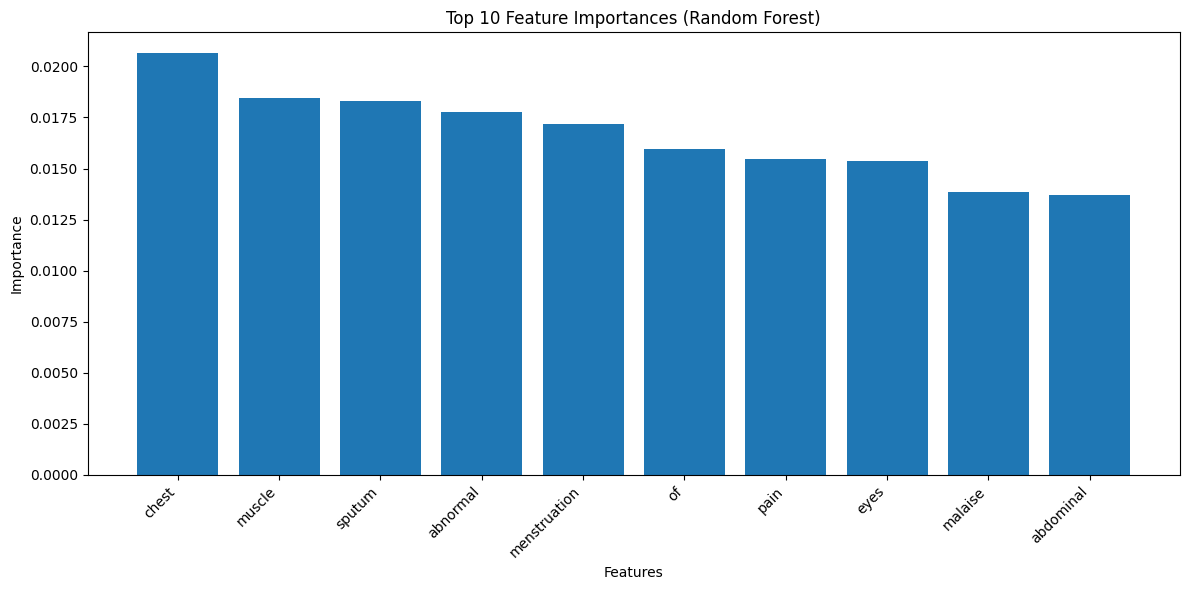

In [96]:
# Feature importance from Random Forest
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance

# Plot Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [tfidf.get_feature_names_out()[i] for i in indices[:10]], rotation=45, ha="right")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [97]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RF_pred = RF.predict(X_test)
accuracy = accuracy_score(y_test, RF_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
from sklearn.metrics import classification_report
lr = classification_report(y_test, RF_pred)
print(lr)

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        36
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.00        34
         

Decision tree visualization

Accuracy: 100.00%


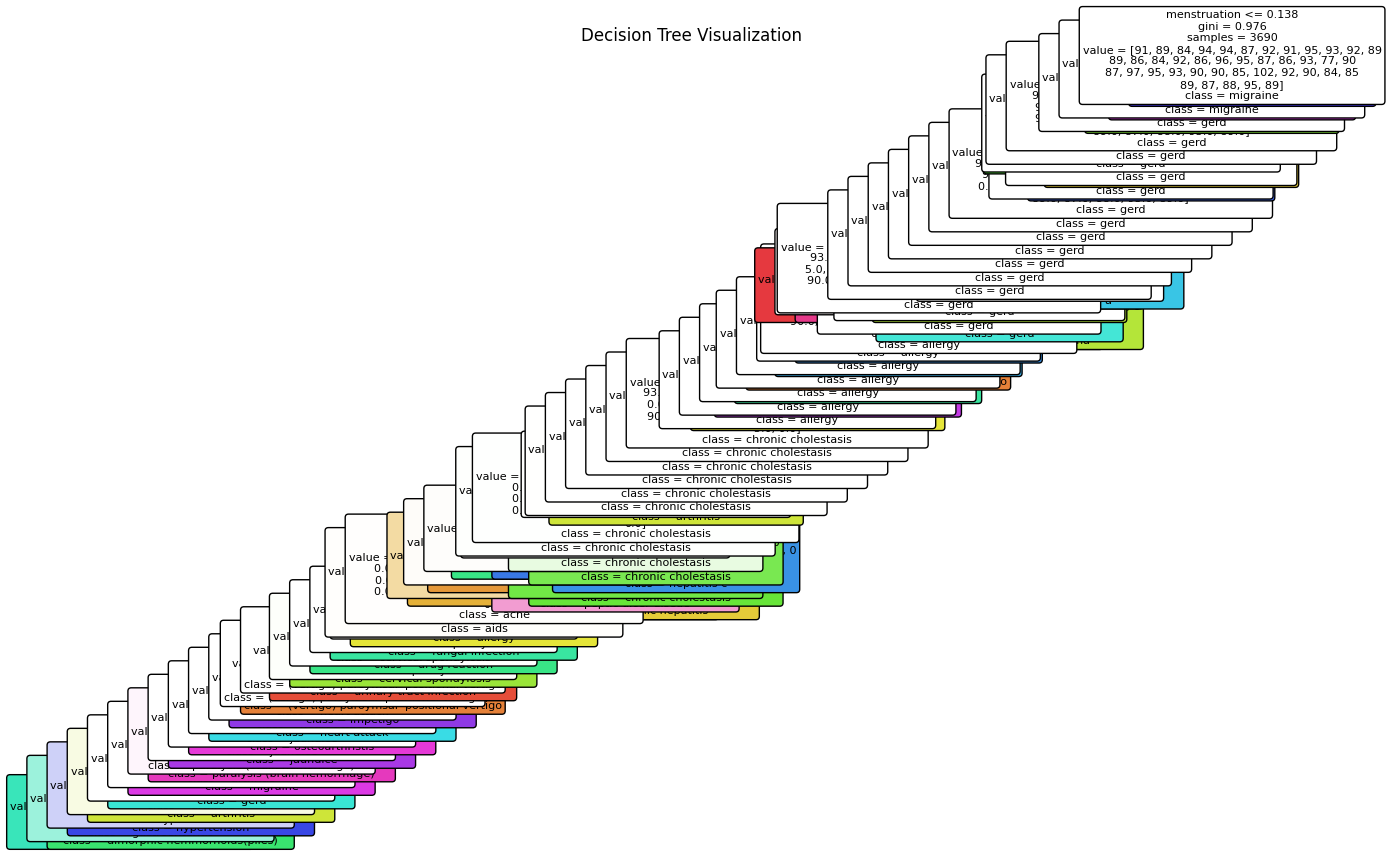

In [98]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train the Decision Tree model
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Make predictions
DT_Pred = DT.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, DT_Pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(
    DT,
    feature_names=tfidf.get_feature_names_out(),
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Visualization")
plt.show()


Accuray

In [99]:
from sklearn.metrics import classification_report
lr = classification_report(y_test, DT_Pred)
print(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        36
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.00        34
          17       1.00    

Confusion matrix

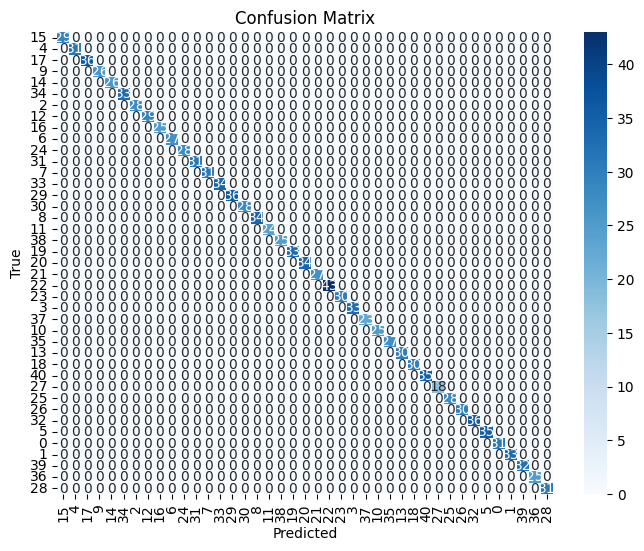

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, DT_Pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [101]:

def predict_disease(symptom_list):
    """
    Predict disease based on a list of symptoms.

    Args:
        symptom_list (list of str): List of symptoms provided by the user.

    Returns:
        str: Predicted disease.
    """
    if not isinstance(symptom_list, list) or not all(isinstance(s, str) for s in symptom_list):
        return "Invalid input. Please provide a list of symptoms as strings."

    # Combine symptoms into a single string
    input_data = ' '.join(symptom_list)

    # Vectorize the input using the trained vectorizer
    input_vector = vectorizer.transform([input_data]).toarray()

    # Make a prediction using the trained model
    prediction = model.predict(input_vector)

    return f"Predicted Disease: {prediction[0]}"


In [102]:

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Handle missing values
df.fillna("missing", inplace=True)

# Combine symptoms into a single feature for simplicity
df['combined_symptoms'] = df.iloc[:, 1:].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Vectorize symptoms
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['combined_symptoms'])
y = df['Disease']

# Feature selection
selector = SelectKBest(chi2, k=300)
X_selected = selector.fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model with regularization
model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

# Cross-validation for performance evaluation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:779: UserWarning: k=300 is greater than n_features=226. All the features will be returned.
  warnings.warn(


Cross-Validation Accuracy: 1.00


In [103]:

def predict_disease_from_input(symptom_list):
    """Predict disease based on user input symptoms."""
    # Ensure the input is a list of strings
    if not isinstance(symptom_list, list) or not all(isinstance(s, str) for s in symptom_list):
        return "Invalid input. Please provide a list of symptoms as strings."

    # Combine symptoms into a single string
    input_data = ' '.join(symptom_list)

    # Vectorize the input using the trained vectorizer
    input_vector = vectorizer.transform([input_data]).toarray()

    # Make a prediction using the trained model
    prediction = model.predict(input_vector)

    return f"Predicted Disease: {prediction[0]}"


Taking input from user


In [104]:
user_input = input("Enter symptoms separated by commas: ")
user_input = user_input.split(',')
result = predict_disease_from_input(user_input)
print(result)

Enter symptoms separated by commas: irritablitiy,chestpain,musclepain
Predicted Disease: hypothyroidism
